In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from matplotlib import pyplot
sns.set()

In [45]:
df = yf.download(tickers = "^GSPC ^FTSE ^N225 ^GDAXI",
                 start = "1994-01-07",
                 end= "2022-10-19",
                 interval="1d",
                 group_by="ticker",
                 auto_adjust=True,
                 treads=True)

[*********************100%***********************]  4 of 4 completed


In [46]:
df["spx"] = df["^GSPC"].Close
df["dax"] = df["^GDAXI"].Close
df["ftse"] = df["^FTSE"].Close
df["nikkei"] = df["^N225"].Close

df = df.iloc[1:]
del df["^N225"]
del df["^GSPC"]
del df["^GDAXI"]
del df["^FTSE"]
df = df.asfreq("b")
df = df.fillna(method="ffill")

In [47]:
df["market_value"] = df.spx
del df["spx"], df["dax"] ,  df["ftse"],  df["nikkei"]

# Returns

In [49]:
df["returns"] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]  #ilk gün nul geleceği için dahil etmiyoruz.

In [50]:
sts.adfuller(df.returns)

(-15.145993211766173,
 6.903598209873575e-28,
 36,
 7469,
 {'1%': -3.4312258265961395,
  '5%': -2.8619270488143216,
  '10%': -2.56697602170141},
 23509.062583425304)

# ARMA

In [48]:
df.head(1)

,market_value
,
Date,
1994-01-10,475.269989


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 7505
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -11806.879
Date:                Thu, 20 Oct 2022   AIC                          23621.758
Time:                        14:38:59   BIC                          23649.451
Sample:                    01-12-1994   HQIC                         23631.267
                         - 10-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0343      0.013      2.679      0.007       0.009       0.059
ar.L1          0.0640      0.051      1.259      0.208      -0.036       0.164
ma.L1         -0.1575      0.051     -3.092      0.0

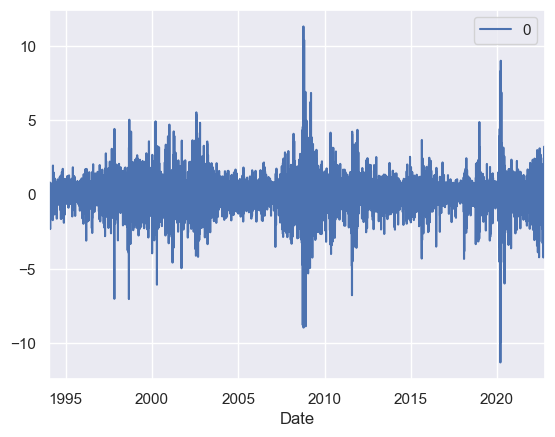

                  0
count  7.505000e+03
mean  -3.489262e-07
std    1.166875e+00
min   -1.130368e+01
25%   -4.712998e-01
50%    2.364552e-02
75%    5.205193e-01
max    1.131475e+01


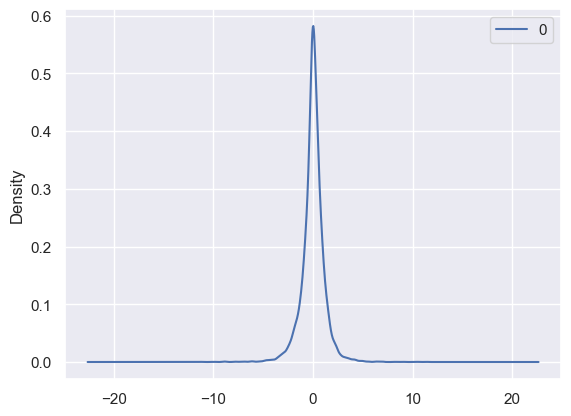

In [63]:
model_ret_ar_1_ma_1 = ARIMA(df.returns[1:], order=(1,0,1))
result_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
print(result_ret_ar_1_ma_1.summary())
## line plot of residuals
residuals = DataFrame(result_ret_ar_1_ma_1.resid)
residuals.plot()
pyplot.show()
## density plot of residuals
residuals.plot(kind='kde')
## summary stats of residuals
print(residuals.describe())